**<h1 align="center">Universidad Internacional del Ecuador</h1>**

**<h2 align="center">Procesamiento de Imágenes y Señales</h2>**

***<h2 align="left">Grupo 6</h2>***
- ***<h2 align="left">DARIO WLADIMIR HERRERA CHÁVEZ</h2>***
- ***<h2 align="left">JONATHAN FABRICIO GUALLI RAMIREZ</h2>***
- ***<h2 align="left">JORGE ARMANDO QUIZAMANCHURO FUEL</h2>***

### 📌 Nota
***Ejecuta el notebook en orden secuencial para que las funciones declaradas en el primer bloque puedan ser usadas en las otras secciones.***

***Link Repositorio:*** https://github.com/daros10/UIDE-Procesamiento-Imagenes-Senales-Deber-1

## - ***Carga de imágenes locales - Operaciones básicas***

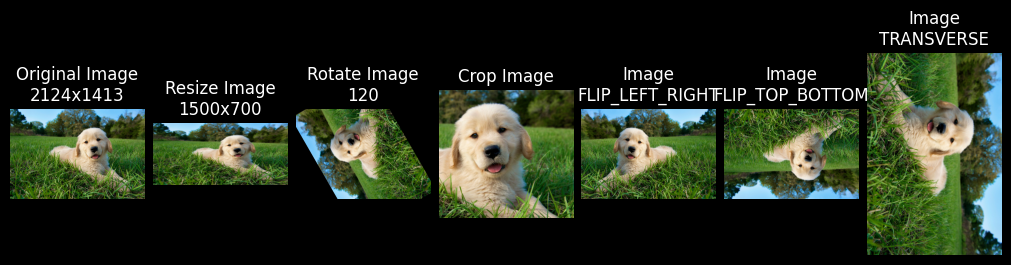

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

def main():
    try:
        image_path = "resources/dog.jpg"
        (resize_width, resize_height) = (1500, 700)
        image_angle = 120
        box_crop = (950, 200, 1900, 1100)
        t_flip = Image.Transpose.FLIP_LEFT_RIGHT
        t_flip_bottom = Image.Transpose.FLIP_TOP_BOTTOM
        t_transverse = Image.Transpose.TRANSVERSE

        image = load_image(image_path, False)
        image_data = get_image_info(image)
        (width, height) = image_data[0]

        _, axes = plot_images(1, 7)
        hide_axes_info(axes)

        axes[0].imshow(image); axes[0].set_title(f"Original Image\n{width}x{height}")
        axes[1].imshow(resize_image(image, resize_width, resize_height)); axes[1].set_title(f"Resize Image\n{resize_width}x{resize_height}")
        axes[2].imshow(rotate_image(image, image_angle)); axes[2].set_title(f"Rotate Image\n{image_angle}")
        axes[3].imshow(crop_image(image, box_crop)); axes[3].set_title(f"Crop Image")
        axes[4].imshow(transpose_image(image, t_flip)); axes[4].set_title(f"Image\nFLIP_LEFT_RIGHT")
        axes[5].imshow(transpose_image(image, t_flip_bottom)); axes[5].set_title(f"Image\nFLIP_TOP_BOTTOM")
        axes[6].imshow(transpose_image(image, t_transverse)); axes[6].set_title(f"Image\nTRANSVERSE")

        plt.show()
    except FileNotFoundError:
        print("There was an error getting the image")

def load_image(image_path, is_take_picture):
    if os.path.exists(image_path):
        return Image.open(image_path)

    if is_take_picture:
        new_path = take_picture(os.path.basename(image_path))
        if new_path and os.path.exists(new_path):
            return Image.open(new_path)

    raise FileNotFoundError("Image could not be loaded")

def get_image_info(image):
    return [image.size, image.format, image.mode]

def plot_images(row, cols):
    return plt.subplots(row, cols, figsize=(10, 5), constrained_layout=True)

def hide_axes_info(axes):
    for ax in axes: ax.axis('off')

def resize_image(image, width, height):
    return image.resize((width,height))

def rotate_image(image, angle):
    return image.rotate(angle=angle)

def crop_image(image, box_crop):
    return image.crop(box_crop)

def transpose_image(image, transpose):
    return image.transpose(transpose)

def filter_image(image, image_filter):
    return image.filter(image_filter)

if __name__ == "__main__":
    main()

## - ***Carga de imágenes desde cámara - Operaciones básicas***

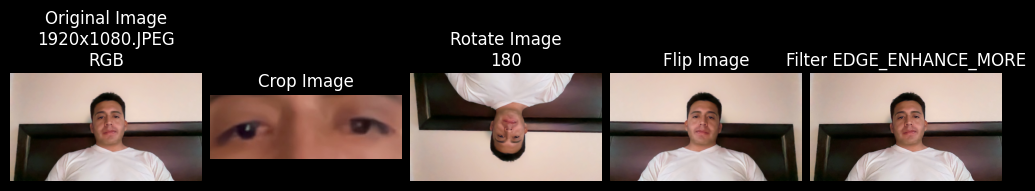

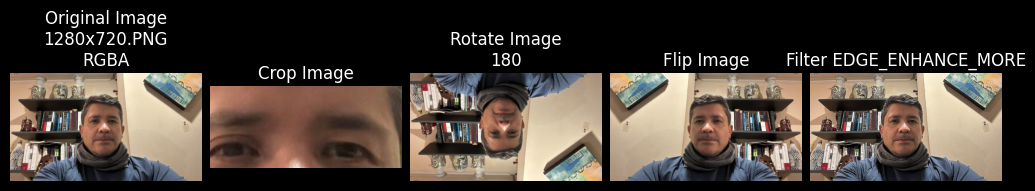

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

def main():
    d_herrera_path = "resources/picture.jpg"
    d_herrera_box_crop = (870, 400, 1108, 480)
    common_process(d_herrera_path, d_herrera_box_crop)

    j_fuel_path = "resources/picture_fuel.png"
    j_fuel_box_crop = (540, 255, 740, 340)
    common_process(j_fuel_path, j_fuel_box_crop)

def common_process(file_name_path, custom_crop):
    try:
        image_path = file_name_path
        image = load_image(image_path, True)
        box_crop = custom_crop
        t_flip = Image.Transpose.FLIP_LEFT_RIGHT
        t_flip_bottom = Image.Transpose.FLIP_TOP_BOTTOM

        image_data = get_image_info(image)
        (width, height) = image_data[0]
        image_format = image_data[1]

        _, axes = plot_images(1,5)
        hide_axes_info(axes)

        axes[0].imshow(image); axes[0].set_title(f"Original Image\n{width}x{height}.{image_format}\n{image.mode}")
        axes[1].imshow(crop_image(image, box_crop)); axes[1].set_title(f"Crop Image")
        axes[2].imshow(transpose_image(image, t_flip_bottom)); axes[2].set_title(f"Rotate Image\n{180}")
        axes[3].imshow(transpose_image(image, t_flip)); axes[3].set_title(f"Flip Image")
        axes[4].imshow(filter_image(image, ImageFilter.EDGE_ENHANCE_MORE)); axes[4].set_title(f"Filter EDGE_ENHANCE_MORE")

        plt.show()
    except FileNotFoundError:
        print("There was an error")


def take_picture(file_name):
    cap = cv2.VideoCapture(0)

    try:
        if not cap.isOpened():
            raise RuntimeError("There was an error, cannot open camera")

        while True:
            ret, frame = cap.read()

            if not ret or frame is None:
                print("Frame is not valid")
                continue

            cv2.imshow("Camera - Press ENTER to SAVE", frame)
            key = cv2.waitKey(30) & 0xFF

            if key != 255:
                print("Keyboard detected:", key, chr(key))

            if key in (10, 13):
                picture_name = file_name
                resources_dir = os.path.join(os.getcwd(), "resources")
                os.makedirs(resources_dir, exist_ok=True)
                path = os.path.join(resources_dir, picture_name)

                image_write = cv2.imwrite(path, frame)
                print("Image save", image_write)
                print("Path:", path)
                return path

            elif key in (ord('q'), ord('Q')):
                return None

    finally:
        cap.release()
        cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


## - ***Carga de imágenes desde cámara -  Detección de bordes***

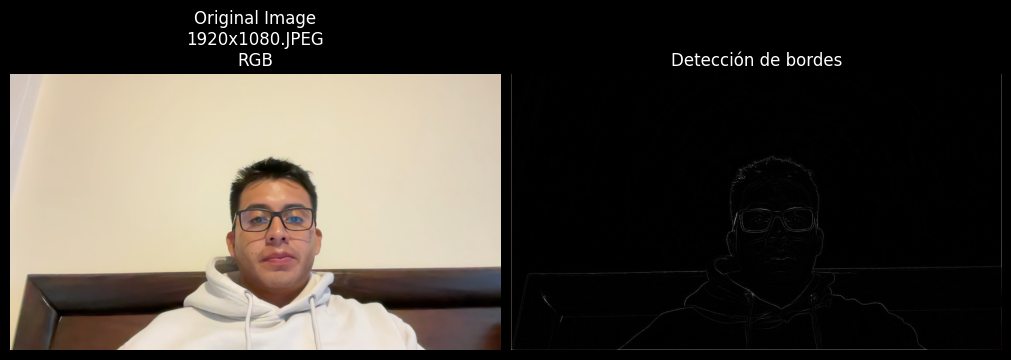

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

def main():
    try:
        image_path = "resources/picture_glasses.jpg"
        image = load_image(image_path, True)
        t_find_edges = ImageFilter.FIND_EDGES

        image_data = get_image_info(image)
        (width, height) = image_data[0]
        image_format = image_data[1]

        _, axes = plot_images(1,2)
        hide_axes_info(axes)

        axes[0].imshow(image); axes[0].set_title(f"Original Image\n{width}x{height}.{image_format}\n{image.mode}")
        axes[1].imshow(image.filter(t_find_edges)); axes[1].set_title("Detección de bordes")

        plt.show()
    except FileNotFoundError:
        print("There was an error")

if __name__ == "__main__":
    main()